In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import api

import importlib
importlib.reload(api)
import urllib.request
import librosa
import os

import pandas as pd

import json

cid = '5c3d73b1e0734983aec11219f14fef4f'
secret = 'f23dddb03f9a4097887e4a251758f86d'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [13]:
bay_area_artists = []

chinese_artists = []


for i in range(50,1000,50):
    bay_area = sp.search(q = 'genre:Bay%area%hip%hop', type='artist', limit = 50, offset = i)

    chinese = sp.search(q = 'genre:chinese%hip%hop', type='artist', limit = 50,  offset = i)
    for i in bay_area['artists']['items']:
        bay_area_artists.append(i)
    
    for i in chinese['artists']['items']:
        chinese_artists.append(i)


In [12]:
len(chinese_artists)

116

In [77]:
for artist in bay_area_artists[10:15]:
    api.show_artist(artist)
    print('\n')

Name  Lil Los
Popularity: 33
Genres: ['bay area hip hop']


Name  Casper Locs
Popularity: 31
Genres: ['bay area hip hop']


Name  Big Rome
Popularity: 31
Genres: ['bay area hip hop']


Name  G-Stack
Popularity: 32
Genres: ['bay area hip hop']


Name  Conspiracy
Popularity: 30
Genres: ['bay area hip hop']




In [76]:
for artist in chinese_artists[:5]:
    api.show_artist(artist)
    print('\n')

Name  Higher Brothers
Popularity: 67
Genres: ['chinese hip hop']


Name  Kris Wu
Popularity: 59
Genres: ['chinese hip hop', 'chinese idol pop']


Name  Jony J
Popularity: 48
Genres: ['chinese hip hop']


Name  VaVa
Popularity: 46
Genres: ['chinese hip hop']


Name  ØZI
Popularity: 54
Genres: ['chinese hip hop', 'taiwan hip hop']




In [14]:
artists_top_tracks = {}
artists_top_tracks['bay_area'] = []
artists_top_tracks['chinese'] = []



In [ ]:
## Getting bay area artist tracks

In [15]:
for artist in bay_area_artists:
  
    artist_album_dic = {}
    artist_album_dic[artist['name']] = []
    
    ##gets top tracks for artist 
    
    artist_top_dic = {}
    artist_top_dic['tracks'] = []
    
    top_tracks = api.top_songs(artist)
    
    for i in top_tracks:
        artist_top_dic['name'] = artist['name']
        artist_top_dic['tracks'].append(i)
    
    artists_top_tracks['bay_area'].append(artist_top_dic)
    


In [ ]:
## Getting chinese artist tracks

In [16]:
##gets all albums
for artist in chinese_artists:
  
    artist_album_dic = {}
    artist_album_dic[artist['name']] = []
    
    ##gets top tracks for artist 
    
    artist_top_dic = {}
    artist_top_dic['tracks'] = []
    
    top_tracks = api.top_songs(artist)
    
    for i in top_tracks:
        artist_top_dic['name'] = artist['name']
        artist_top_dic['tracks'].append(i)
    
    artists_top_tracks['chinese'].append(artist_top_dic)
    



In [ ]:
## download songs for bay area artists 

In [28]:
for i in artists_top_tracks['bay_area']:
    directory =  '../test-music-data'
    cat = 'bay_area'
    artist_name = i['name']
    top_tracks = i['tracks']
    for i in top_tracks:
            api.download_track(i,directory,\
                               cat, artist_name)


189459

In [75]:
## download songs for chinese artists 

In [74]:
for i in artists_top_tracks['chinese']:
    directory =  '../test-music-data'
    cat = 'chinese'
    artist_name = i['name']
    top_tracks = i['tracks']
    for i in top_tracks:
            api.download_track(i,directory,\
                               cat, artist_name)

No Preview URL found for track - Made In China


In [17]:
feat = sp.audio_features('spotify:track:4nWPmn1tqegITYKdZOJpKv')

keys_list = list(feat[0].keys())[:11]
keys_list.append('duration_ms')
keys_list.append('time_signature')


In [31]:
table_dic = []

for loc in artists_top_tracks:
    for artist in artists_top_tracks[loc]:
        for tracks in artist['tracks']:
            dic = {}
            dic['type'] = loc
            dic['name'] = artist['name']
            dic['track_name'] = tracks['name']
            dic['uri'] = tracks['uri']
            dic['release_date'] = tracks['album']['release_date']
            feat = sp.audio_features(tracks['uri'])[0]
            for key in keys_list:
                dic[key] = feat[key]
            table_dic.append(dic)
    

df = pd.DataFrame(table_dic)

In [39]:
df['year']  = df['release_date'].apply(lambda x: x.split('-')[0][2:])

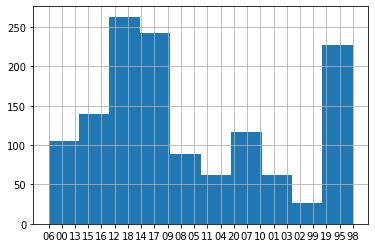

In [41]:
%matplotlib inline  
df['year'].hist()

In [35]:
print(df.shape)
df.head()

(1331, 19)


,type,name,track_name,uri,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,bay_area,Brother Ig,Momma Don't Cry,spotify:track:6twPZrq5K0SzZ58BPq3Xq1,2006-01-01,0.597,0.667,9,-6.367,0,0.139,0.0556,0.000000,0.0901,0.330,69.914,320360,4,2006
1,bay_area,Brother Ig,In the Rain,spotify:track:4XNmJhkDLlIicfEBK1mdmN,2000-01-01,0.766,0.513,8,-6.355,0,0.188,0.0718,0.000000,0.4840,0.601,74.026,302413,4,2000
2,bay_area,Brother Ig,"I'm 1 Too Remix (feat. Casper, Saylah, Joe the...",spotify:track:61tgIW6tACZxAdhKLHPqhf,2013-05-31,0.646,0.737,1,-5.070,1,0.219,0.1270,0.000000,0.5280,0.597,79.941,313519,4,2013
3,bay_area,Brother Ig,Worst Enemy,spotify:track:429vuLezT1UdSrZjYG5Ki3,2000-01-01,0.811,0.565,5,-8.662,0,0.255,0.1770,0.000000,0.1170,0.541,80.049,337000,4,2000
4,bay_area,Brother Ig,Keep Holding On,spotify:track:3UWwDTyn0RrMYoCnGThpJz,2000-01-01,0.840,0.532,10,-7.983,0,0.100,0.0677,0.000508,0.0914,0.817,90.026,276507,4,2000


In [142]:
df.to_csv('../data/table.csv')

In [141]:
df.groupby('type')['speechiness'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
bay_area,500.0,0.235104,0.113507,0.0251,0.1520,0.2415,0.30625,0.841
chinese,481.0,0.144709,0.105136,0.0253,0.0569,0.1120,0.21800,0.557
